In [486]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Предворительная обработка

In [487]:
df = pd.read_excel('C:/data.xlsx')
df = df.rename(columns={'Unnamed: 0': 'Ссылка'})
df = df.set_index('Ссылка')
df['Цена квартиры'] = round(df['Цена квартиры']/1000000, 3) # чтобы красиво видеть стоимость квартиры в миллионах
df = df.rename(columns={'Цена квартиры': 'Цена квартиры(в млн)'})
df.head(5)

,Цена квартиры(в млн),Район,Время до метро (пешком),Общая площадь,Жилая площадь,Этаж,Этажей в доме,Год сдачи,Отделка,Высота потолков
Ссылка,,,,,,,,,,
https://www.cian.ru/sale/flat/287316997/,37.031,Хамовники,15,49.80,11.3,4,18.0,2026,Без отделки,3.25
https://www.cian.ru/sale/flat/284003619/,62.100,Левобережный,5,123.11,70.4,13,20.0,2022,Чистовая,3.30
https://www.cian.ru/sale/flat/286934990/,115.883,Хамовники,15,156.20,57.6,12,18.0,2026,Без отделки,3.25
https://www.cian.ru/sale/flat/281845936/,89.355,Пресненский,14,140.77,62.8,14,26.0,2025,Без отделки,3.10
https://www.cian.ru/sale/flat/286934993/,89.915,Хамовники,15,122.60,44.7,12,18.0,2026,Без отделки,3.25


In [488]:
# Посмотрим, есть ли у нас нулевые значения.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, https://www.cian.ru/sale/flat/287316997/ to https://www.cian.ru/sale/flat/274079207/
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Цена квартиры(в млн)     984 non-null    float64
 1   Район                    984 non-null    object 
 2   Время до метро (пешком)  984 non-null    int64  
 3   Общая площадь            984 non-null    float64
 4   Жилая площадь            984 non-null    float64
 5   Этаж                     984 non-null    int64  
 6   Этажей в доме            974 non-null    float64
 7   Год сдачи                984 non-null    int64  
 8   Отделка                  984 non-null    object 
 9   Высота потолков          984 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 84.6+ KB


In [489]:
# Посмотрим на квартиры, у которых в столбце "Этажей в доме" стоят нулевые значения.

df.loc[df['Этажей в доме'].isnull()]

,Цена квартиры(в млн),Район,Время до метро (пешком),Общая площадь,Жилая площадь,Этаж,Этажей в доме,Год сдачи,Отделка,Высота потолков
Ссылка,,,,,,,,,,
https://www.cian.ru/sale/flat/268579037/,107.835,Арбат,4,111.4,50.8,12,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579035/,133.420,Арбат,4,140.0,67.8,14,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579027/,174.494,Арбат,5,183.1,92.8,21,NaN,5,Без отделки,3.2
https://www.cian.ru/sale/flat/268579028/,178.150,Арбат,5,181.6,77.7,20,NaN,5,Без отделки,3.2
https://www.cian.ru/sale/flat/268579032/,101.192,Арбат,5,101.7,51.2,13,NaN,6,Без отделки,3.0
https://www.cian.ru/sale/flat/268579031/,90.726,Арбат,5,102.4,51.2,13,NaN,6,Без отделки,3.0
https://www.cian.ru/sale/flat/268579036/,104.544,Арбат,4,109.7,48.9,12,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579035/,133.420,Арбат,4,140.0,67.8,14,NaN,6,Без отделки,3.2
https://www.cian.ru/sale/flat/268579027/,174.494,Арбат,5,183.1,92.8,21,NaN,5,Без отделки,3.2


In [490]:
# Все эти квартиры являются частью ЖК «De Luxe квартал апартаментов «Театральный Дом»». Они имеют немного иную html-разметку,
# (поэтому год сдачи отображается неадекватно, а этажность не соотвествует действительности), поэтому криво спарсились. Просто 
# удалим их.

df = df.dropna(subset=['Этажей в доме'])
df['Этажей в доме'] = df['Этажей в доме'].astype(int) # также изменим тип значений столбца на более удобный

In [491]:
# Названия переменных полно и чётко отражают их описание.

Сначало было принято решение удалить из датафрейма квартиры, стоимость которых превышает 262 миллиона рублей. 95% квантиль - приблизительно 240 миллионов рублей. Квартир, дороже этой суммы - 49 штук, причём 25% из них не так далеко ушли от значения в 240 - максимум 262 миллиона рублей. 50% квантиль этих сверхдорогих аппартаментов уже 432 миллиона рублей - разброс уже значительный.

Но потом укоренилась идея, что удалять такие квартиры из выборки неправильно. В Москве существует прослойка сверхдорогих квартир (хоть и небольшая) и исключать их из внимания неправильно.

## Визуализация

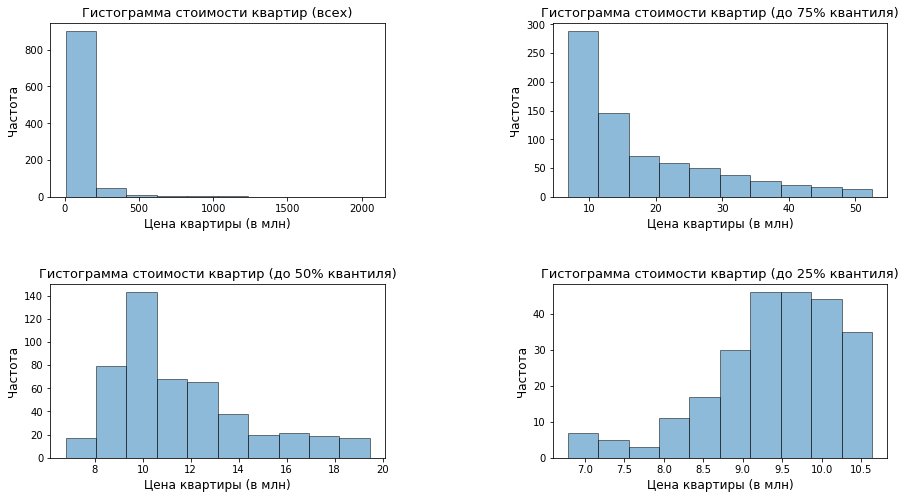

In [492]:
# Посмотрим на распределение стоимости квартир.

fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df['Цена квартиры(в млн)'], edgecolor='black', alpha=0.5)
axs[0, 0].set_title('Гистограмма стоимости квартир (всех)', fontsize = 13)
axs[0, 0].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[0, 0].set_ylabel('Частота', fontsize = 12)
axs[0, 1].hist(df.loc[df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 75), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha = 0.5) # до 75% квантиля
axs[0, 1].set_title('Гистограмма стоимости квартир (до 75% квантиля)', fontsize = 13)
axs[0, 1].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[0, 1].set_ylabel('Частота', fontsize = 12)
axs[1, 0].hist(df.loc[df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 50), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha = 0.5) # до 50% квантиля
axs[1, 0].set_title('Гистограмма стоимости квартир (до 50% квантиля)', fontsize = 13)
axs[1, 0].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[1, 0].set_ylabel('Частота', fontsize = 12)
axs[1, 1].hist(df.loc[df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 25), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha=0.5) # до 25% квантиля
axs[1, 1].set_title('Гистограмма стоимости квартир (до 25% квантиля)', fontsize = 13);
axs[1, 1].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[1, 1].set_ylabel('Частота', fontsize = 12)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

Появилась идея разделить квартиры на 5 классов по стоимости. Сделано это по логике, заложенной в ящик с усами.

Очень дешёвые квартиры: от 0 до Q1 (т.к значений Q1 - iqr (интерквантильный размах) меньше нуля).

Дешёвые квартиры: от Q1 до Q2

Средние квартиры: от Q2 до Q3.

Дорогие квартиры: от Q3 До Q3 + 1.5 * iqr

Очень дорогие (элитные) квартиры (df_elite): Q3 + 1.5 * iqr и выше

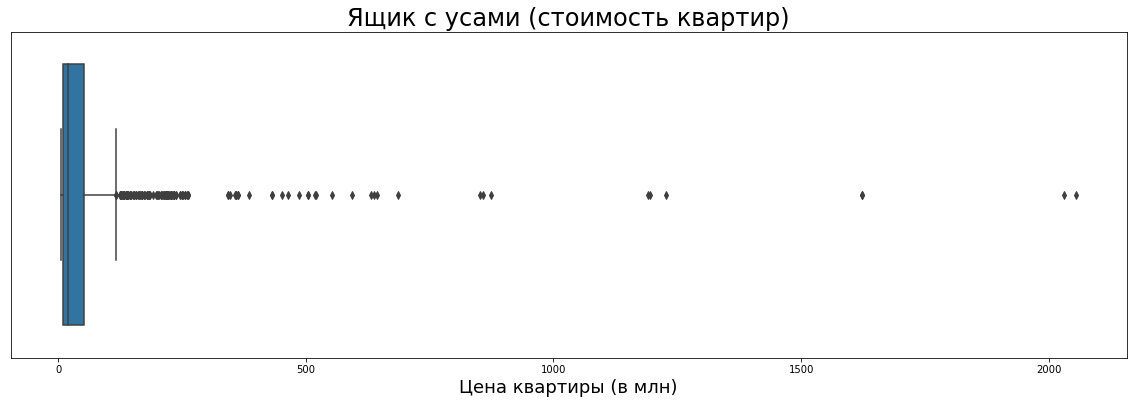

In [493]:
plt.figure(figsize = (20,6),)
plt.title('Ящик с усами (стоимость квартир)', fontsize = 24)
plt.xlabel('Цена квартиры (в млн)', fontsize = 18)
sns.boxplot(df['Цена квартиры(в млн)'], orient = 'h')
plt.yticks([]);

In [494]:
# Cоздадим новые датафреймы.

iqr = np.percentile(df['Цена квартиры(в млн)'], 75) - np.percentile(df['Цена квартиры(в млн)'], 25)
df_main = df[df['Цена квартиры(в млн)'] < np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr]
df_elite = df[df['Цена квартиры(в млн)'] >= np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr]

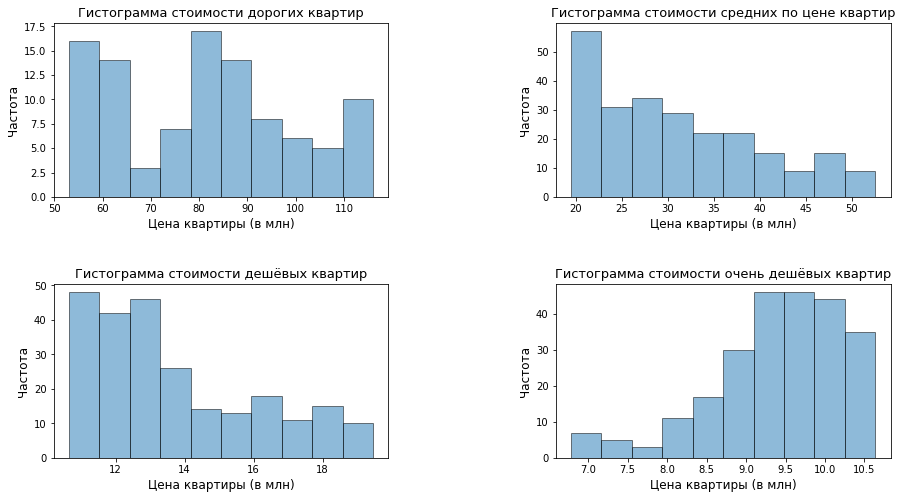

In [495]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].hist(df.loc[(df['Цена квартиры(в млн)'] > np.percentile(df['Цена квартиры(в млн)'], 75)) & (df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha = 0.5) # 
axs[0, 0].set_title('Гистограмма стоимости дорогих квартир', fontsize = 13)
axs[0, 0].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[0, 0].set_ylabel('Частота', fontsize = 12)
axs[0, 1].hist(df.loc[(df['Цена квартиры(в млн)'] > np.percentile(df['Цена квартиры(в млн)'], 50)) & (df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 75)), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha = 0.5) 
axs[0, 1].set_title('Гистограмма стоимости средних по цене квартир', fontsize = 13)
axs[0, 1].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[0, 1].set_ylabel('Частота', fontsize = 12)
axs[1, 0].hist(df.loc[(df['Цена квартиры(в млн)'] > np.percentile(df['Цена квартиры(в млн)'], 25)) & (df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 50)), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha = 0.5)
axs[1, 0].set_title('Гистограмма стоимости дешёвых квартир', fontsize = 13)
axs[1, 0].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[1, 0].set_ylabel('Частота', fontsize = 12)
axs[1, 1].hist(df.loc[df['Цена квартиры(в млн)'] <= np.percentile(df['Цена квартиры(в млн)'], 25), ['Цена квартиры(в млн)']].copy(), edgecolor='black', alpha = 0.5)
axs[1, 1].set_title('Гистограмма стоимости очень дешёвых квартир', fontsize = 13);
axs[1, 1].set_xlabel('Цена квартиры (в млн)', fontsize = 12)
axs[1, 1].set_ylabel('Частота', fontsize = 12)

plt.subplots_adjust(hspace= 0.5, wspace= 0.5)

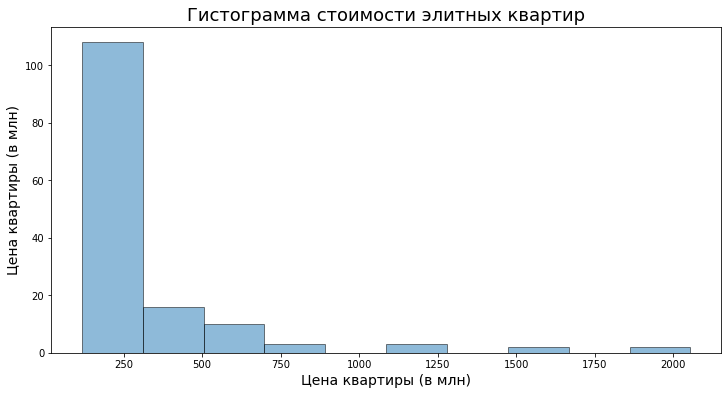

In [496]:
plt.figure(figsize = (12,6))
plt.hist(df_elite['Цена квартиры(в млн)'], edgecolor = 'black', alpha = 0.5)
plt.title('Гистограмма стоимости элитных квартир', fontsize = 18)
plt.xlabel('Цена квартиры (в млн)', fontsize = 14)
plt.ylabel('Цена квартиры (в млн)', fontsize = 14);

#### Важно:
графики ниже не искажаются присутствием в данных элитных квартир (визуализация улучшена благодаря логарифмированию шкал).

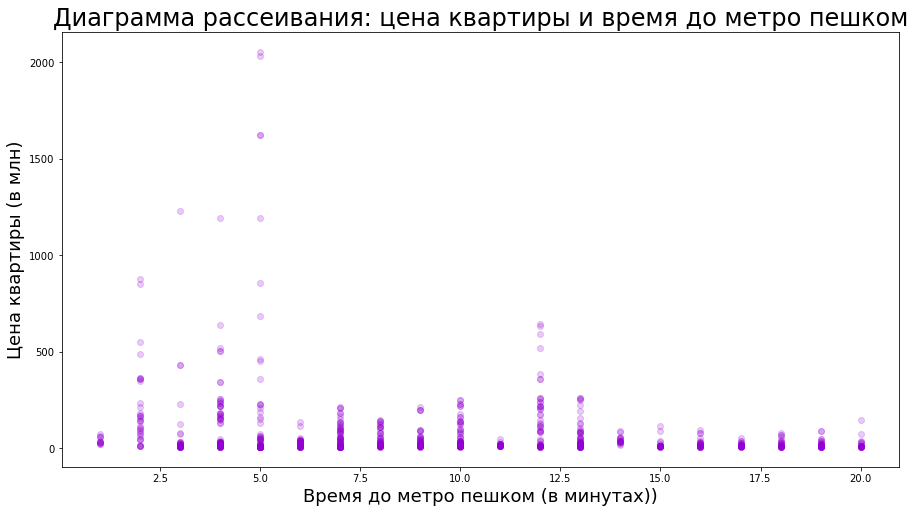

In [497]:
# Построим диаграмму рассеяния для цены квартиры и времени до метро.

plt.figure(figsize = (15,8))
plt.scatter(df['Время до метро (пешком)'], df['Цена квартиры(в млн)'], c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и время до метро пешком', fontsize = 24);
plt.ylabel('Цена квартиры (в млн)', fontsize = 18)
plt.xlabel('Время до метро пешком (в минутах))', fontsize = 18);

Едва ли между данными есть связь, но интересно, что почти у всехсверхдорогих квартир (от 500 млн рублей) время до метро не превышает пяти минут.

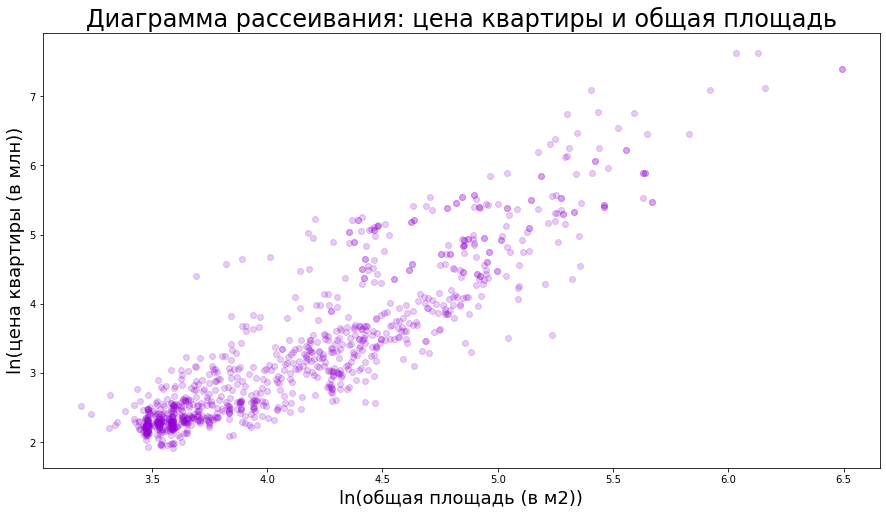

In [498]:
# Построим диаграмму рассеяния для цены квартиры и общей площади.

plt.figure(figsize = (15,8))
plt.scatter(np.log(df['Общая площадь']), np.log(df['Цена квартиры(в млн)']), c = 'darkviolet', alpha = 0.2)
plt.plot(kind='kde', linewidth=4)
plt.title('Диаграмма рассеивания: цена квартиры и общая площадь', fontsize = 24);
plt.ylabel('ln(цена квартиры (в млн))', fontsize = 18)
plt.xlabel('ln(общая площадь (в м2))', fontsize = 18);

Между данными прослеживается положительная линейная связь.

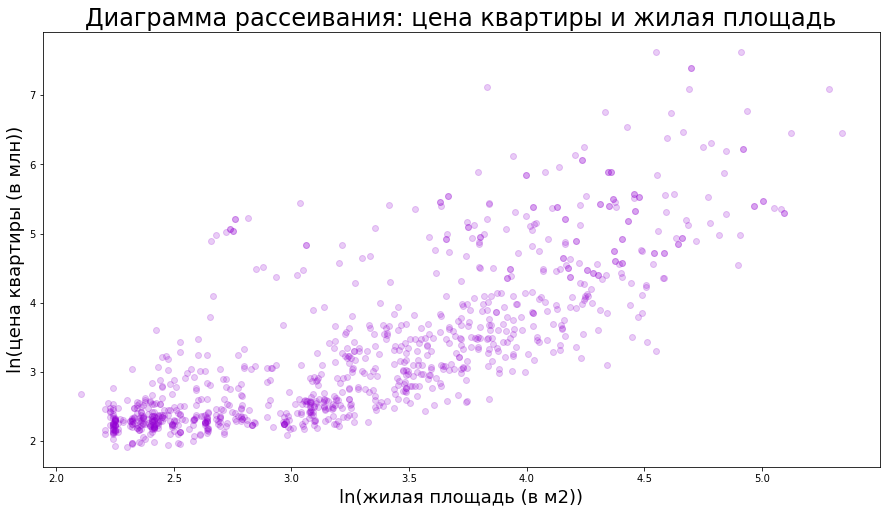

In [499]:
# Построим диаграмму рассеивания между ценой квартиры и жилой площадью.

plt.figure(figsize = (15,8))
plt.scatter(np.log(df['Жилая площадь']), np.log(df['Цена квартиры(в млн)']), c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и жилая площадь', fontsize = 24);
plt.ylabel('ln(цена квартиры (в млн))', fontsize = 18)
plt.xlabel('ln(жилая площадь (в м2))', fontsize = 18);

Между данными прослеживается положительная линейная связь.

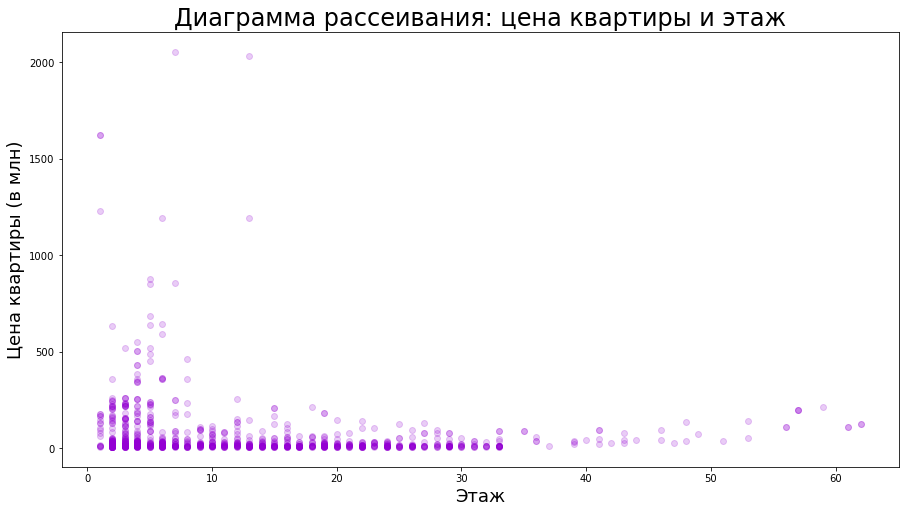

In [500]:
# Построим диаграмму рассеивания между ценой квартиры и этажом квартиры.

plt.figure(figsize = (15,8))
plt.scatter(df['Этаж'], df['Цена квартиры(в млн)'], c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и этаж', fontsize = 24);
plt.ylabel('Цена квартиры (в млн)', fontsize = 18)
plt.xlabel('Этаж', fontsize = 18);

Визуально связи не наблюдается. Интересно, что элитное жильё, судя по всему, редко располагается на этажах выше 20.

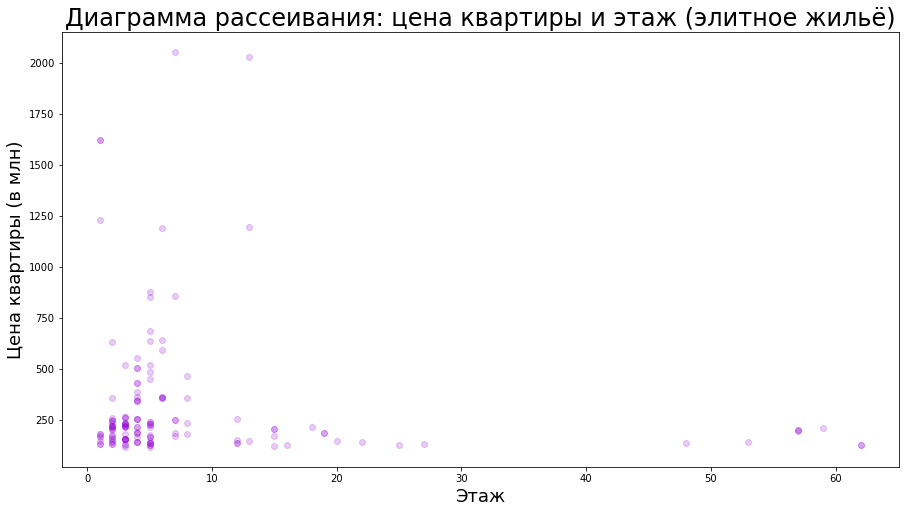

In [501]:
plt.figure(figsize = (15,8))
plt.scatter(df_elite['Этаж'], df_elite['Цена квартиры(в млн)'], c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и этаж (элитное жильё)', fontsize = 24);
plt.ylabel('Цена квартиры (в млн)', fontsize = 18)
plt.xlabel('Этаж', fontsize = 18);

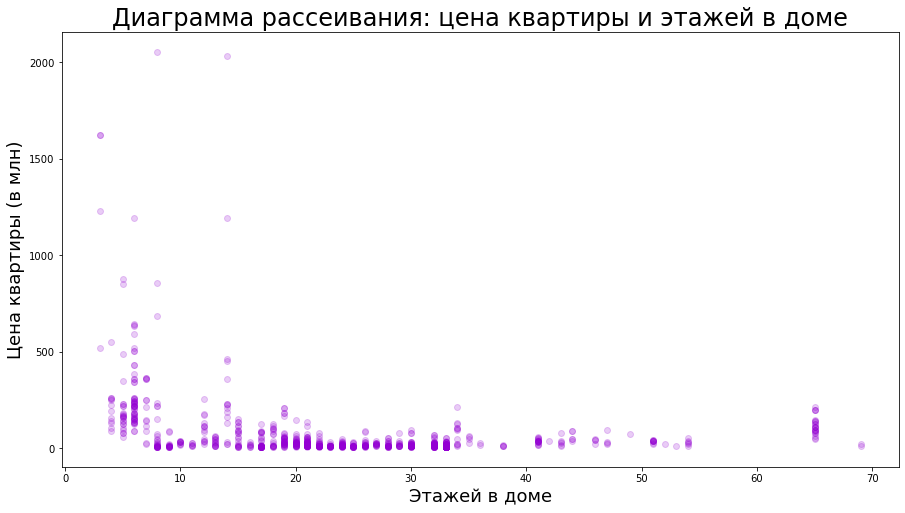

In [502]:
# Построим диаграмму рассеивания между ценой квартиры и этажностью здания.

plt.figure(figsize = (15,8))
plt.scatter((df['Этажей в доме']), (df['Цена квартиры(в млн)']), c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и этажей в доме', fontsize = 24);
plt.ylabel('Цена квартиры (в млн)', fontsize = 18)
plt.xlabel('Этажей в доме', fontsize = 18);

Особой связи не наблюдается, но можно заметить, что особо дорогие квартиры в основном встречаются в невысоких зданиях (до приблизительно 15 этажей). 

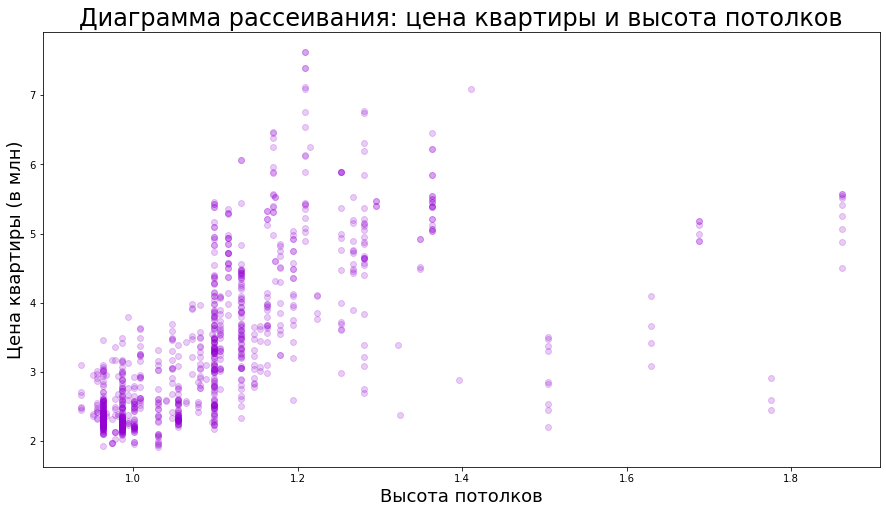

In [503]:
# Построим диаграмму рассеивания между ценой квартиры и типом отделки.

plt.figure(figsize = (15,8))
plt.scatter(np.log(df['Высота потолков']), np.log(df['Цена квартиры(в млн)']), c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и высота потолков', fontsize = 24);
plt.ylabel('Цена квартиры (в млн)', fontsize = 18)
plt.xlabel('Высота потолков', fontsize = 18);

Какая-то связь тут точно есть, но вряд ли линейная.

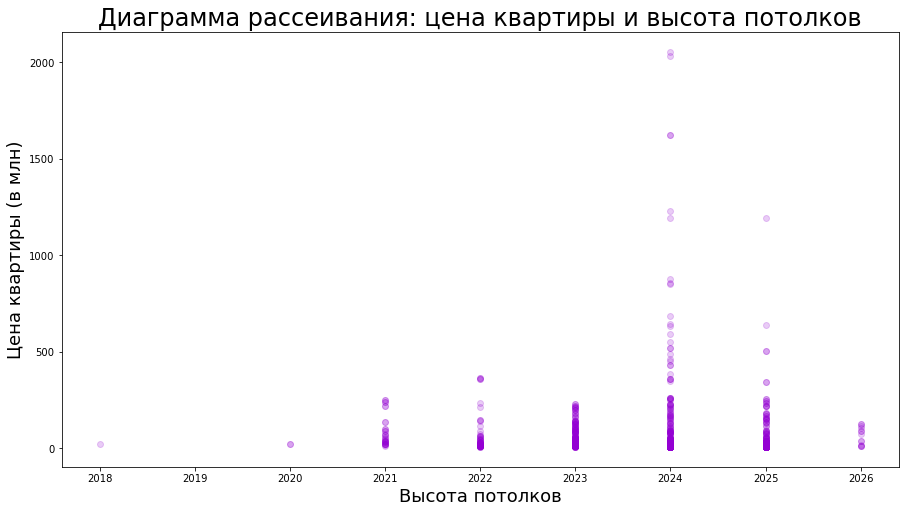

In [504]:
# Построим диаграмму рассеивания между ценой квартиры и типом отделки.

plt.figure(figsize = (15,8))
plt.scatter((df['Год сдачи']), (df['Цена квартиры(в млн)']), c = 'darkviolet', alpha = 0.2)
plt.title('Диаграмма рассеивания: цена квартиры и высота потолков', fontsize = 24);
plt.ylabel('Цена квартиры (в млн)', fontsize = 18)
plt.xlabel('Высота потолков', fontsize = 18);

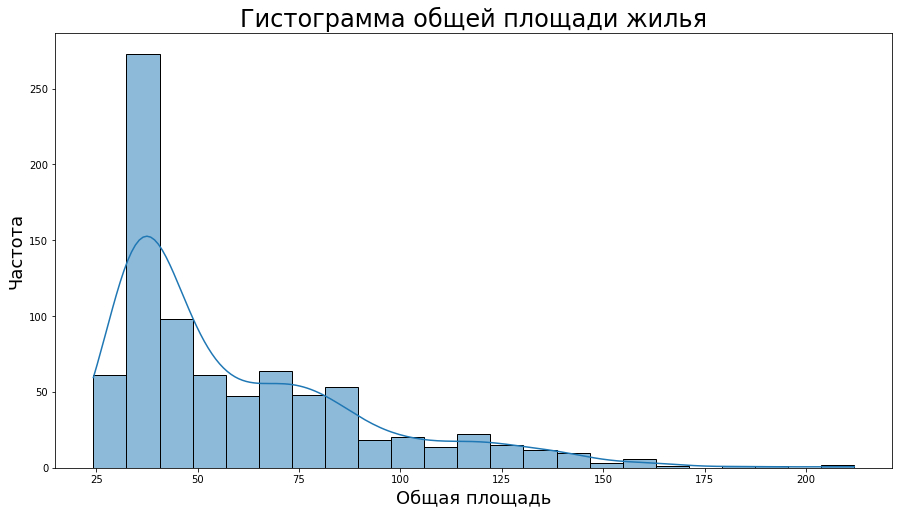

In [505]:
# Посмотрим на гистограмму общей площади жилья. Ради интереса. 

plt.figure(figsize = (15,8))
sns.histplot(df_main['Общая площадь'], kde = True, alpha = 0.5)
plt.title('Гистограмма общей площади жилья', fontsize = 24);
plt.xlabel('Общая площадь', fontsize = 18)
plt.ylabel('Частота', fontsize = 18);

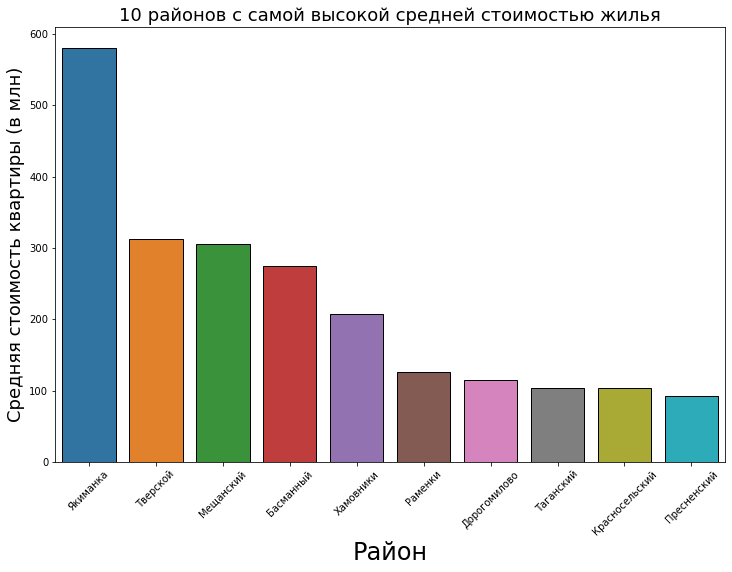

In [506]:
# Посмотрим на 10 районов с самой высокой средней стоимостью жилья

mean_prices = df.groupby('Район')['Цена квартиры(в млн)'].mean()
top_10_districts = mean_prices.sort_values(ascending=False).head(10).index
high_districts = mean_prices.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=high_districts.index, y=high_districts.values, edgecolor = 'black')
plt.xticks(rotation=45);
plt.xlabel('Район', fontsize = 24)
plt.ylabel('Cредняя стоимость квартиры (в млн)', fontsize = 18)
plt.title('10 районов с самой высокой средней стоимостью жилья', fontsize = 18);

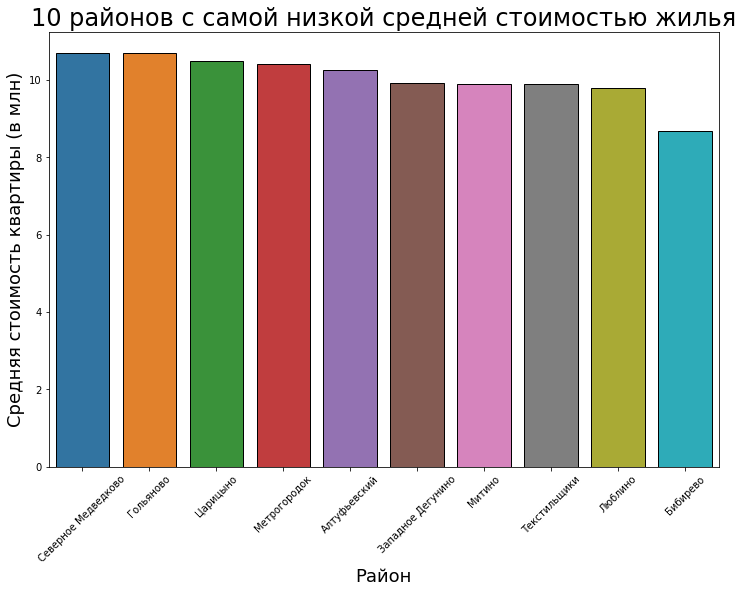

In [507]:
# Посмотрим на 10 районов с самой низкой средней стоимостью жилья

mean_prices = df.groupby('Район')['Цена квартиры(в млн)'].mean()
top_10_districts = mean_prices.sort_values(ascending=False).tail(10).index
low_districts = mean_prices.sort_values(ascending=False).tail(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=low_districts.index, y=low_districts.values, edgecolor = 'black')
plt.xticks(rotation=45);
plt.xlabel('Район', fontsize = 18)
plt.ylabel('Cредняя стоимость квартиры (в млн)', fontsize = 18)
plt.title('10 районов с самой низкой средней стоимостью жилья', fontsize = 24);

## Создание новых признаков

Ранее мы уже, по-сути, создали новый признак - тип квартиры (дешёвая, средняя и т.д). Добавим его в датафреймы. 
(см. Обращение 3 в папке ChatGPT)

In [508]:
df['Класс'] = df['Цена квартиры(в млн)'].apply(lambda x: 'Элитная' if x > np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr else ('Дорогая' if x > np.percentile(df['Цена квартиры(в млн)'], 75) and x < np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr else ('Средняя' if x > np.percentile(df['Цена квартиры(в млн)'], 50) and x < np.percentile(df['Цена квартиры(в млн)'], 75) else ('Дешёвая' if x > np.percentile(df['Цена квартиры(в млн)'], 25) and x < np.percentile(df['Цена квартиры(в млн)'], 50) else 'Очень дешёвая'))))

In [509]:
df_main['Класс'] = df_main['Цена квартиры(в млн)'].apply(lambda x: 'Элитная' if x > np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr else ('Дорогая' if x > np.percentile(df['Цена квартиры(в млн)'], 75) and x < np.percentile(df['Цена квартиры(в млн)'], 75) + 1.5 * iqr else ('Средняя' if x > np.percentile(df['Цена квартиры(в млн)'], 50) and x < np.percentile(df['Цена квартиры(в млн)'], 75) else ('Дешёвая' if x > np.percentile(df['Цена квартиры(в млн)'], 25) and x < np.percentile(df['Цена квартиры(в млн)'], 50) else 'Очень дешёвая'))))

Теперь подготовимся к машинному обучению. Уже очевидно (в том числе благодаря визуализациям), что как минимум одна категориальная переменная - "Район" демонстрирует свзяь с ценой квартиры. В этом проекте планируется строить линейную модель, а она работает лишь с числовыми признаками. Проведём OHE, чтобы можно было использовать в нашем МО и категориальные признаки. Создадим таблицу df_ml, в которой будут сохранены признаки после приведённого OHE, но не будем включать в неё признак "Класс" - очевидно, что он в некоторой степени дублирует цену квартиры и это может привести к переобучению.

In [510]:
df_ml = df.drop('Класс', axis = 1)
df_ml = pd.get_dummies(df_ml)
df_main_ml = df_main.drop('Класс', axis = 1)
df_main_ml = pd.get_dummies(df_main_ml)

## Гипотезы

Если для площадей всё понятно - они явно коррелируют с ценой квартиры (а, соответственно, и с классом квартиры), то с дискретными данными, такими как: отделка, высота потолков, время пешком до метро, этаж, этажей в доме, год сдачи - всё не так очевидно. Проверим гипотезы о независимости этих данных и цены квартиры. Будем использовать критерий Пирсона-Фишера.

In [511]:
# Проверим гипотезу о независимости для цены квартиры и высоты потолков.

cross_table = pd.crosstab(df['Цена квартиры(в млн)'], df['Высота потолков'])

chi2_statistic, p_value, degrees_of_freedom, expected_freq = sts.chi2_contingency(cross_table)

alpha = 0.01

# Проверка гипотезы
if p_value < alpha:
    print("Гипотеза о независимости переменных отвергается.")
else:
    print("Гипотеза о независимости переменных не отвергается.")
    
p_value

Гипотеза о независимости переменных отвергается.


1.812813027743943e-17

In [512]:
df['Цена квартиры(в млн)'].corr(df['Время до метро (пешком)'])

-0.1779788291640388

In [513]:
# Проверим гипотезу о независимости для цены квартиры и типа отделки. Гипотеза отвергается,но мы сравниваем с небольшим уровнем
# значимости.

cross_table = pd.crosstab(df['Цена квартиры(в млн)'], df['Отделка'])

chi2_statistic, p_value, degrees_of_freedom, expected_freq = sts.chi2_contingency(cross_table)

alpha = 0.01

# Проверка гипотезы
if p_value < alpha:
    print("Гипотеза о независимости переменных отвергается.")
else:
    print("Гипотеза о независимости переменных не отвергается.")
    
p_value

Гипотеза о независимости переменных не отвергается.


0.013179058499961982

In [514]:
# Проверим гипотезу о независимости для цены квартиры и высоты потолков.

cross_table = pd.crosstab(df['Цена квартиры(в млн)'], df['Год сдачи'])

chi2_statistic, p_value, degrees_of_freedom, expected_freq = sts.chi2_contingency(cross_table)

alpha = 0.01

# Проверка гипотезы
if p_value < alpha:
    print("Гипотеза о независимости переменных отвергается.")
else:
    print("Гипотеза о независимости переменных не отвергается.")
    
p_value

Гипотеза о независимости переменных отвергается.


0.0003027159471564936

In [515]:
# Проверим гипотезу о независимости для цены квартиры и этажом.

cross_table = pd.crosstab(df['Цена квартиры(в млн)'], df['Этаж'])

chi2_statistic, p_value, degrees_of_freedom, expected_freq = sts.chi2_contingency(cross_table)

alpha = 0.01

# Проверка гипотезы
if p_value < alpha:
    print("Гипотеза о независимости переменных отвергается.")
else:
    print("Гипотеза о независимости переменных не отвергается.")
    
p_value

Гипотеза о независимости переменных отвергается.


1.846297695193972e-17

In [516]:
# Проверим гипотезу о независимости для цены квартиры и этажности дома.

cross_table = pd.crosstab(df['Цена квартиры(в млн)'], df['Этажей в доме'])

chi2_statistic, p_value, degrees_of_freedom, expected_freq = sts.chi2_contingency(cross_table)

alpha = 0.01

# Проверка гипотезы
if p_value < alpha:
    print("Гипотеза о независимости переменных отвергается.")
else:
    print("Гипотеза о независимости переменных не отвергается.")
    
p_value

Гипотеза о независимости переменных отвергается.


1.153123078454819e-15

In [517]:
# Проверим гипотезу о независимости для цены квартиры и высоты потолков.

cross_table = pd.crosstab(df['Цена квартиры(в млн)'], df['Время до метро (пешком)'])

chi2_statistic, p_value, degrees_of_freedom, expected_freq = sts.chi2_contingency(cross_table)

alpha = 0.01

# Проверка гипотезы
if p_value < alpha:
    print("Гипотеза о независимости переменных отвергается.")
else:
    print("Гипотеза о независимости переменных не отвергается.")
    
p_value

Гипотеза о независимости переменных отвергается.


9.649938037130576e-06

Попробуем проверить ещё одну интересную гипотезу. В последнее время в новостях часто можно услышать, что квартиры в новостройках становятся всё меньше и меньше по своей площади. Изучив интернет-статьи, я нашёл много новостных статей на эту тему (https://iz.ru/1495571/2023-04-09/za-god-ploshchad-novostroek-v-massovom-segmente-snova-zametno-sokratilas, , https://www.banki.ru/news/lenta/?id=10969831, https://www.metrium.ru/news/detail/srednyaya-ploshchad-kvartir-v-massovykh-novostroykakh-moskvy-pokazala-novyy-minimum/, https://tass.ru/nedvizhimost/12572055)

Проверим предсказание ЦИАНа из последней статьи. В 2019 аналитики предполагали, что общая площадь жилья сданного в  Москве в 2023 году составит 50,4 кв. м. Обычно в такой аналитике речь не идёт о квартирах премиум-класса, поэтому будем использовать датафрейм с очень дешёвыми - дорогими квартирами (от стандарт-класса до бизнес-класса). Проверим гипотезу, что математическое ожидание общей площади жилья, сданного в 2023 году, равно 50,4, против гипотезы, что не равно. Будем использовать уровень значимости 1%, так как нам точно неизвестно, квартиры какого ценового сегмента рассматривались в исследовании, поэтому сделаем поблажку. 

In [518]:
df_flats2023 = df_main[df_main['Год сдачи'].isin([2023])]
diff = df_flats2023['Общая площадь'].mean() - 50.4
std = np.sqrt(df_flats2023['Общая площадь'].var(ddof = 1)/df_flats2023['Общая площадь'].size)
t_obs = diff/std 
t_crit = sts.t.ppf(1 - 0.01/2, df_flats2023['Общая площадь'].size - 1)
if abs(t_obs) > abs(t_crit):
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


In [519]:
df_flats2023['Общая площадь'].size # данных достаточно для асимптотики

160

Получается, что на основе спаршенных квартир, гипотеза отвергается. Возможно, моё деление на классы неверно и сюда всё-таки попадают квартиры премиум-класса. Ограничимся значением 75% квантиля.

In [520]:
df_flats2023 = df_main[df_main['Год сдачи'].isin([2023])]
df_flats2023 = df_flats2023.loc[df_flats2023['Цена квартиры(в млн)'] <= np.percentile(df_flats2023['Цена квартиры(в млн)'], 75)]
diff = df_flats2023['Общая площадь'].mean() - 50.4
std = np.sqrt(df_flats2023['Общая площадь'].var(ddof = 1)/df_flats2023['Общая площадь'].size)
t_obs = diff/std 
t_crit = sts.t.ppf(1 - 0.01/2, df_flats2023['Общая площадь'].size - 1)
if abs(t_obs) > abs(t_crit):
    print('H0 отвергается')
else:
    print('H0 не отвергается')

H0 отвергается


Всё равно отвергается. Давайте ради интереса посмотрим на ДИ для матожидания (для изначального df_main).

In [521]:
df_flats2023 = df_main[df_main['Год сдачи'].isin([2023])]
std = np.sqrt(df_flats2023['Общая площадь'].var(ddof = 1)/df_flats2023['Общая площадь'].size)
t_value = sts.t.ppf(1 - 0.01/2, df_flats2023['Общая площадь'].size - 1)
left = df_flats2023['Общая площадь'].mean() - std*t_value
right = df_flats2023['Общая площадь'].mean() + std*t_value
print('Доверительный интервал [{:.4}; {:.4}]'.format(left, right))

Доверительный интервал [64.3; 77.98]


А теперь посмотрим на ДИ для датафрейма с ещё более дешёвыми квартирами.

In [522]:
df_flats2023 = df_main[df_main['Год сдачи'].isin([2023])]
df_flats2023 = df_flats2023.loc[df_flats2023['Цена квартиры(в млн)'] <= np.percentile(df_flats2023['Цена квартиры(в млн)'], 75)]
std = np.sqrt(df_flats2023['Общая площадь'].var(ddof = 1)/df_flats2023['Общая площадь'].size)
t_value = sts.t.ppf(1 - 0.01/2, df_flats2023['Общая площадь'].size - 1)
left = df_flats2023['Общая площадь'].mean() - std*t_value
right = df_flats2023['Общая площадь'].mean() + std*t_value
print('Доверительный интервал [{:.4}; {:.4}]'.format(left, right))

Доверительный интервал [53.84; 66.31]


Больше прогнозов. Конечно, данный проект не претендует на полную подлинность. Непонятно, на какой именно ценовой сегмент смотрели аналитики ЦИАНА. Данных хоть и достаточно для асимптотики, но для суждения о правильности/неправильности оценок слишком мало. Более того, оценки других экспертов (см. статьи) показывают, что в действительности средняя площадь жилья в 2022-2023 оказалась даже ниже прогнозов ЦИАНА.

## Машинное обучение

Обучим линейную модель, которая будет предсказывать стоимость квартиры по остальным признакам, хранящимся в нашем датафрейме df_ml. Смысл такой задачи очевиден - оценить стоимость квартиры можно и по сравнению с аналогами, но это звучит устаревше и скучно. Тем более, даже у ЦИАНа есть свой сервис, предлагающий оценить стоимость квартиры по заданным параметром. С ним, конечно, сложно тягаться, но в учебных целях попробуем сделать своё МО.

В качестве оценки будем использовать к MAE (для большей интерпретируемости - MAPE), так как она более устойчива к выбросам (цены на элитное жильё).

In [523]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [524]:
# Начнём с линейной регрессии, определим признаки.

model = LinearRegression()

x = df_ml.drop('Цена квартиры(в млн)', axis = 1)
y = pd.DataFrame((df_ml['Цена квартиры(в млн)']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [525]:
# Здесь и далее будем делать кросс-валидацию для обучения и оценки моделей.

cv_scores = cross_val_score(model, x_train_scaled, y_train, 
                            cv=10, scoring='neg_mean_absolute_percentage_error')

print("Mean CV MAE = %.4f" % np.mean(-cv_scores))

Mean CV MAE = 533316572182.0764


In [526]:
# Сравним с наивным прогнозом, хотя тут всё и так понятно.

best_constant = float(y_train.median())
naive = mean_absolute_percentage_error(y_test, best_constant * np.ones(y_test.shape))
print('MAPE, наивный прогноз: {}'.format(naive))

MAPE, наивный прогноз: 0.7102797629960373


Это грустно, но ожидаемо. Даже по визуализациям было видно, что связи не всегда линейны, а значит линейная регрессия для наших целей не подходит.
Попробуем другие модели, случайны лес, например.

In [527]:
model = RandomForestRegressor()

x = df_ml.drop('Цена квартиры(в млн)', axis = 1)
y = pd.DataFrame((df_ml['Цена квартиры(в млн)']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [528]:
cv_scores = cross_val_score(model, x_train_scaled, y_train, 
                            cv=10, scoring='neg_mean_absolute_percentage_error')

print("Mean CV MAPE, случайный лес= %.4f" % np.mean(-cv_scores))

Mean CV MAPE, случайный лес= 0.1581


Попробуем подобрать гиперпараметры.

In [529]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 1, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs = -1)

grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

print("Лучшие параметры:", best_params)

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [530]:
model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
cv_scores = cross_val_score(model, x_train_scaled, y_train, 
                            cv=10, scoring='neg_mean_absolute_percentage_error')

print("Mean CV MAPE, случайный лес с подобранными гиперпараметрами = %.4f" % np.mean(-cv_scores))

Mean CV MAPE, случайный лес с подобранными гиперпараметрами = 0.1580


Попробуем теперь использовать бустинг.

In [531]:
model = xgb.XGBRegressor(random_state = 42)

cv_scores = cross_val_score(model, x_train_scaled, y_train, 
                            cv=10, scoring='neg_mean_absolute_percentage_error')

print("Mean CV MAPE, бустинг = %.4f" % np.mean(-cv_scores))

Mean CV MAPE, бустинг = 0.1415


Я прогнал xgboost и случайный лес несколько раз, и всегда бустинг показывает слегка лучший результат.

In [532]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 3, 5, 7],
    'learning_rate': [None, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)

grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

print("Лучшие параметры:", best_params)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [533]:
model = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 7, n_estimators = 300, random_state = 42)
cv_scores = cross_val_score(model, x_train_scaled, y_train, 
                            cv=10, scoring='neg_mean_absolute_percentage_error')

print("Mean CV MAPE, бустинг с подобранными гиперпараметрами = %.4f" % np.mean(-cv_scores))

Mean CV MAPE, бустинг с подобранными гиперпараметрами = 0.1360
